In [2]:
desktop_dir = "C:/Users/user/Desktop"

length_train = "length_TRAIN"
length_test = "length_TEST"

텍스트 파일들을 성공적으로 불러왔습니다.
Train 데이터 개수: 10000
Test 데이터 개수: 1000
전체 데이터 개수: 11000



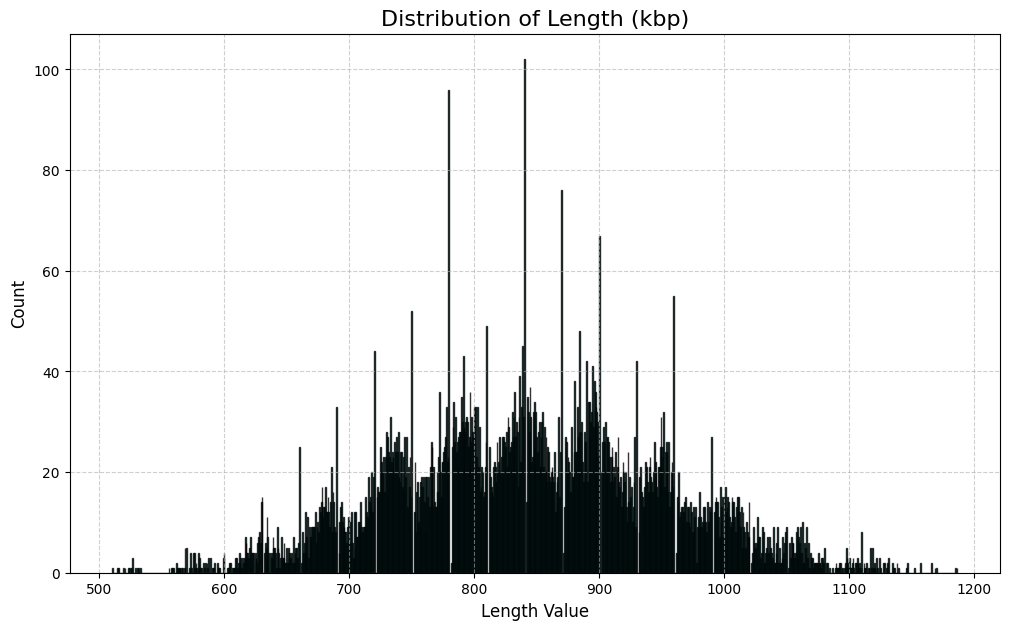

     전체 Length 데이터 범주별 요약 (Train + Test)
구간 (Scale Group)  데이터 개수 (Count) 비율 (Percentage)
         0 ~ 100               0           0.00%
       100 ~ 500               0           0.00%
      500 ~ 1000           10146          92.24%
         1000 이상             854           7.76%


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# --- 1. 파일 경로 설정 ---
# 확장자가 없으므로 파일명만 정확하게 입력합니다.
desktop_dir = Path("C:/Users/user/Desktop")
train_filename = "length_TRAIN"
test_filename = "length_TEST"

train_file_path = desktop_dir / train_filename
test_file_path = desktop_dir / test_filename

# --- 2. 텍스트 파일 불러오기 (np.loadtxt 사용) ---
# 이 방법은 파일 내에 숫자 데이터만 있을 때 가장 잘 작동합니다.
try:
    # np.loadtxt는 텍스트 파일을 읽어 NumPy 배열로 바로 변환해 줍니다.
    train_data = np.loadtxt(train_file_path)
    test_data = np.loadtxt(test_file_path)
    print("텍스트 파일들을 성공적으로 불러왔습니다.")

except FileNotFoundError:
    print(f"오류: {train_file_path} 또는 {test_file_path} 에서 파일을 찾을 수 없습니다. 경로와 파일명을 확인해주세요.")
    exit() # 파일이 없으면 실행 중지
except ValueError:
    # 만약 파일에 숫자 외의 문자(예: 헤더)가 포함되어 있다면 이 오류가 발생할 수 있습니다.
    print(f"오류: 파일 내에 숫자로 변환할 수 없는 데이터가 포함되어 있습니다.")
    print("파일 첫 줄에 헤더(문자)가 있다면 np.genfromtxt(..., skip_header=1) 사용을 고려해보세요.")
    exit() # 오류 발생 시 실행 중지


# --- 3. Train, Test 데이터 합치기 ---
combined_data = np.concatenate([train_data, test_data])
print(f"Train 데이터 개수: {len(train_data)}")
print(f"Test 데이터 개수: {len(test_data)}")
print(f"전체 데이터 개수: {len(combined_data)}\n")


# ===================================================================
# 4. 데이터 분포 시각화 (Matplotlib 히스토그램)
# ===================================================================
plt.figure(figsize=(12, 7))

plt.hist(combined_data, bins=1000, color='darkcyan', alpha=0.8, edgecolor='black')

plt.title('Distribution of Length (kbp)', fontsize=16)
plt.xlabel('Length Value', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)



plt.show()


# ===================================================================
# 5. 4가지 범주로 나눈 요약 표 작성 (Pandas 사용)
# ===================================================================
bins = [0, 100, 500, 1000, np.inf]
labels = ['0 ~ 100', '100 ~ 500', '500 ~ 1000', '1000 이상']

category_series = pd.cut(combined_data, bins=bins, labels=labels, right=False)
counts = category_series.value_counts().sort_index()

summary_df = pd.DataFrame({
    '구간 (Scale Group)': counts.index,
    '데이터 개수 (Count)': counts.values
})

total_count = len(combined_data)
summary_df['비율 (Percentage)'] = (summary_df['데이터 개수 (Count)'] / total_count * 100).map('{:.2f}%'.format)

print("="*50)
print("     전체 Length 데이터 범주별 요약 (Train + Test)")
print("="*50)
print(summary_df.to_string(index=False))